Step 1: Load and Combine the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from scipy import stats
from scipy.stats import ttest_rel, friedmanchisquare
import joblib

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Set random seeds for reproducibility
np.random.seed(42)
import random
random.seed(42)

In [3]:
df1=pd.read_csv(r'C:\Users\Jegadeeswaran\Documents\PODS Mini Project\Dataset\UNSW-NB15_1.csv',header=None,low_memory=False)
df2=pd.read_csv(r'C:\Users\Jegadeeswaran\Documents\PODS Mini Project\Dataset\UNSW-NB15_2.csv',header=None,low_memory=False)
df3=pd.read_csv(r'C:\Users\Jegadeeswaran\Documents\PODS Mini Project\Dataset\UNSW-NB15_3.csv',header=None,low_memory=False)
df4=pd.read_csv(r'C:\Users\Jegadeeswaran\Documents\PODS Mini Project\Dataset\UNSW-NB15_4.csv',header=None,low_memory=False)

df=pd.concat([df1,df2,df3,df4],ignore_index=True)
df.head()

print("Data concatenated and columns set successfully.")
print("Shape of the combined DataFrame:",df.shape)

Data concatenated and columns set successfully.
Shape of the combined DataFrame: (2540047, 49)


Step 2: Assign Column Names

In [4]:
col = pd.read_csv(r'C:\Users\Jegadeeswaran\Documents\PODS Mini Project\Dataset\UNSW-NB15_features.csv', header=None, encoding='ISO-8859-1')
df.columns=col[1].tolist()
print("Column Successfully Assigned")

Column Successfully Assigned


In [5]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


Step 3: Sanity Check

In [6]:
df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

In [7]:
df.dtypes

srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

In [8]:
if 'label' in df.columns:
    print(df['Label'].value_counts(dropna=False))
elif 'attack_cat' in df.columns:
    print(df['attack_cat'].value_counts(dropna=False))

attack_cat
NaN                 2218764
Generic              215481
Exploits              44525
 Fuzzers              19195
DoS                   16353
 Reconnaissance       12228
 Fuzzers               5051
Analysis               2677
Backdoor               1795
Reconnaissance         1759
 Shellcode             1288
Backdoors               534
Shellcode               223
Worms                   174
Name: count, dtype: int64


In [9]:
print("Missing Values in each column:\n",df.isna().sum().sort_values(ascending=False))

Missing Values in each column:
 attack_cat          2218764
is_ftp_login        1429879
ct_flw_http_mthd    1348145
sport                     0
proto                     0
state                     0
dstip                     0
dsport                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
dur                       0
sbytes                    0
srcip                     0
Spkts                     0
Dload                     0
Sload                     0
Dpkts                     0
dtcpb                     0
swin                      0
dwin                      0
stcpb                     0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
smeansz                   0
dmeansz                   0
trans_depth               0
tcprtt                    0
Dintpkt         

Step 4 Data Cleaning

Step 4.1 Fixing Column Names

In [10]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ', '_')

Step 4.2 Handling Data Types

In [11]:
df['sport']=pd.to_numeric(df['sport'],errors='coerce')
df['dsport']=pd.to_numeric(df['dsport'],errors='coerce')

In [12]:
df['ct_ftp_cmd']=pd.to_numeric(df['ct_ftp_cmd'],errors='coerce')

In [13]:
def convert_to_binary(df, column):
    df[column] = (df[column] > 0).astype(int)
    return df

column = 'is_ftp_login'
convert_to_binary(df, column)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390.0,149.171.126.6,53.0,udp,CON,0.001055,132,164,31,...,0.0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661.0,149.171.126.9,1024.0,udp,CON,0.036133,528,304,31,...,0.0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464.0,149.171.126.7,53.0,udp,CON,0.001119,146,178,31,...,0.0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593.0,149.171.126.5,53.0,udp,CON,0.001209,132,164,31,...,0.0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664.0,149.171.126.0,53.0,udp,CON,0.001169,146,178,31,...,0.0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094.0,149.171.126.7,43433.0,tcp,FIN,0.087306,320,1828,31,...,NaN,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848.0,149.171.126.4,21.0,tcp,CON,0.365058,456,346,31,...,2.0,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511.0,149.171.126.9,21.0,tcp,CON,6.335154,1802,2088,31,...,2.0,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433.0,149.171.126.0,80.0,tcp,CON,2.200934,3498,166054,31,...,NaN,1,1,2,4,2,2,2,NaN,0


Step 4.3 Checking and Handling Missing Values and Duplicates

In [14]:
if 'label' in df.columns:
    df.loc[(df['attack_cat'].isna()) & (df['label'] == 1), 'attack_cat'] = 'unknown_attack'

# Otherwise, assume 'normal' traffic for missing values
df['attack_cat'] = df['attack_cat'].fillna('normal')
# Ensure consistent formatting
df['attack_cat'] = df['attack_cat'].str.strip().str.lower()

In [15]:
print(df[['is_sm_ips_ports', 'is_ftp_login']].isnull().sum())

df['is_sm_ips_ports'] = df['is_sm_ips_ports'].fillna(0).astype('int64')

df['is_ftp_login'] = df['is_ftp_login'].fillna(
    df.groupby('proto')['is_ftp_login'].transform(lambda x: x.mode()[0] if not x.mode().empty else 0)
)
print(df[['is_sm_ips_ports', 'is_ftp_login']].info())

is_sm_ips_ports    0
is_ftp_login       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 2 columns):
 #   Column           Dtype
---  ------           -----
 0   is_sm_ips_ports  int64
 1   is_ftp_login     int64
dtypes: int64(2)
memory usage: 38.8 MB
None


In [16]:
http_mode = df['ct_flw_http_mthd'].mode()[0]
fill_value = 0 if http_mode == 0 else http_mode
df['ct_flw_http_mthd'] = df['ct_flw_http_mthd'].fillna(fill_value)

In [17]:
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].fillna(0)

In [18]:
df['service']=df['service'].replace('-', 'Not Much Used')
df['state']=df['state'].replace('-', 'Not Much State')

In [19]:
df['dsport'] = df['dsport'].fillna(0)
df['sport'] = df['sport'].fillna(0)

In [20]:
df.isna().sum().sort_values(ascending=False)

srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
sload               0
dload               0
spkts               0
dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
sjit                0
djit                0
stime               0
ltime               0
sintpkt             0
dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src__ltm         0
ct_src_dport_ltm    0
ct_dst_spo

In [21]:
df.duplicated().sum()

np.int64(480639)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
print(df)

                srcip    sport           dstip   dsport proto state       dur  \
0          59.166.0.0   1390.0   149.171.126.6     53.0   udp   CON  0.001055   
1          59.166.0.0  33661.0   149.171.126.9   1024.0   udp   CON  0.036133   
2          59.166.0.6   1464.0   149.171.126.7     53.0   udp   CON  0.001119   
3          59.166.0.5   3593.0   149.171.126.5     53.0   udp   CON  0.001209   
4          59.166.0.3  49664.0   149.171.126.0     53.0   udp   CON  0.001169   
...               ...      ...             ...      ...   ...   ...       ...   
2540039    59.166.0.1  38606.0   149.171.126.9     80.0   tcp   CON  0.564998   
2540041    59.166.0.1  38606.0   149.171.126.9     80.0   tcp   CON  0.564998   
2540042    59.166.0.5  33094.0   149.171.126.7  43433.0   tcp   FIN  0.087306   
2540045    59.166.0.9  35433.0   149.171.126.0     80.0   tcp   CON  2.200934   
2540046  175.45.176.0  17293.0  149.171.126.17    110.0   tcp   CON  0.942984   

         sbytes  dbytes  st

In [24]:
print(df[['state', 'proto', 'service']])

        state proto        service
0         CON   udp            dns
1         CON   udp  Not Much Used
2         CON   udp            dns
3         CON   udp            dns
4         CON   udp            dns
...       ...   ...            ...
2540039   CON   tcp           http
2540041   CON   tcp  Not Much Used
2540042   FIN   tcp       ftp-data
2540045   CON   tcp           http
2540046   CON   tcp           pop3

[2059408 rows x 3 columns]


In [25]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390.0,149.171.126.6,53.0,udp,CON,0.001055,132,164,31,...,0.0,3,7,1,3,1,1,1,normal,0
1,59.166.0.0,33661.0,149.171.126.9,1024.0,udp,CON,0.036133,528,304,31,...,0.0,2,4,2,3,1,1,2,normal,0
2,59.166.0.6,1464.0,149.171.126.7,53.0,udp,CON,0.001119,146,178,31,...,0.0,12,8,1,2,2,1,1,normal,0
3,59.166.0.5,3593.0,149.171.126.5,53.0,udp,CON,0.001209,132,164,31,...,0.0,6,9,1,1,1,1,1,normal,0
4,59.166.0.3,49664.0,149.171.126.0,53.0,udp,CON,0.001169,146,178,31,...,0.0,7,9,1,1,1,1,1,normal,0


Step 5: Exploratory Data Analysis

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Attact Categories Distribution')

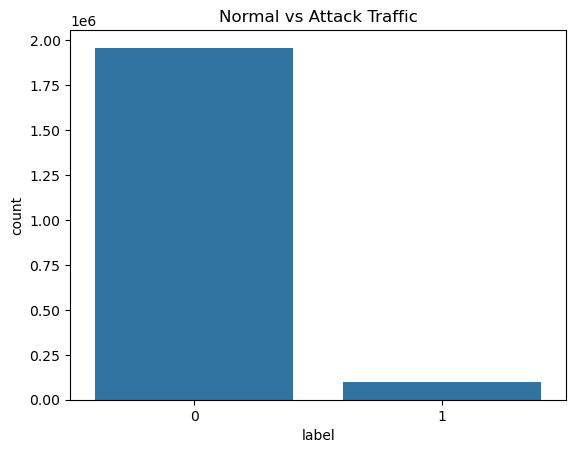

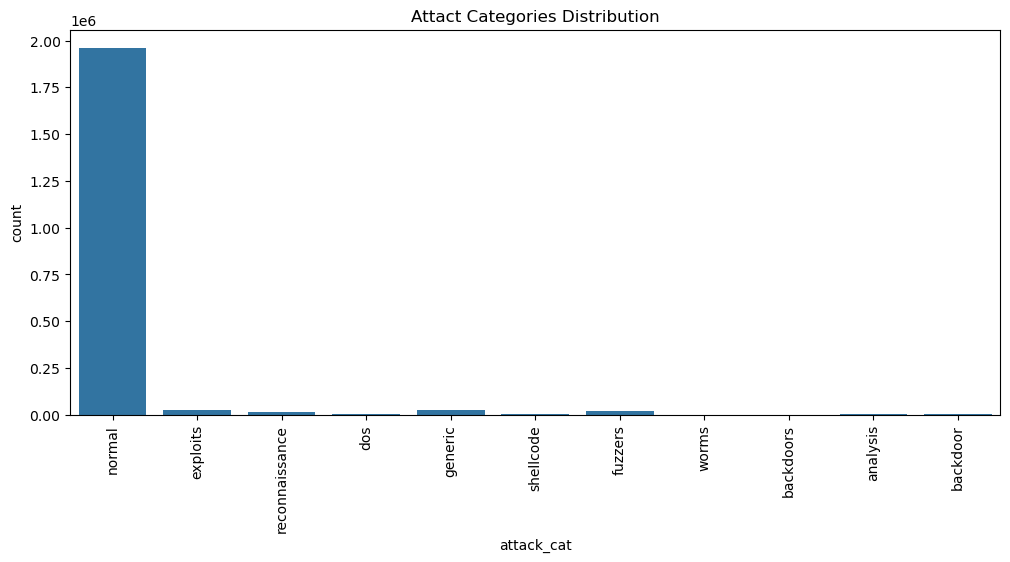

In [27]:
sns.countplot(x='label', data=df)
plt.title('Normal vs Attack Traffic')

plt.figure(figsize=(12,5))
sns.countplot(x='attack_cat',data=df)
plt.xticks(rotation=90)
plt.title('Attact Categories Distribution')

In the dataset most of them are normal traffic and less than 25% is a threat or attack traffic.

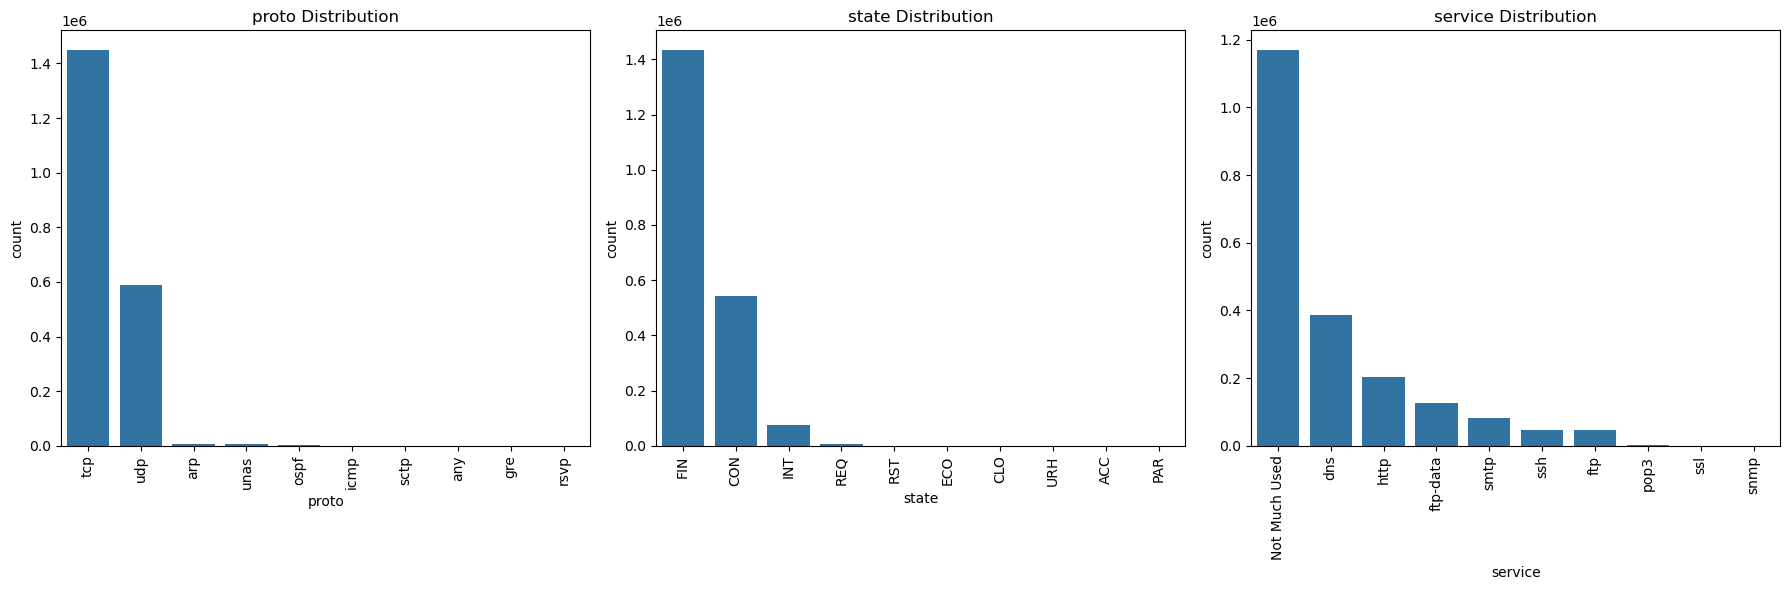

In [28]:
categorical_features = ['proto', 'state', 'service']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(
        x=col,
        data=df,
        order=df[col].value_counts().index[:10],
        ax=axes[i]  
    )
    axes[i].set_title(f"{col} Distribution")
    axes[i].tick_params(axis='x', rotation=90)
    
plt.tight_layout()  
plt.show()

Based on the above plots:

proto Distribution: 
    Tcp is mostly used as Transaction protocol.

state Distribution: 
    Most of the connection that was established is terminated as FIN.
    Some traffic is conn established and remains open.
    some are interupted or incomplete connection.

service Distribution: 
    Most fo the service is not used.
    The used service are dns,http.

In [29]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Total Numerical Columns: {len(numerical_columns)}")
print("Numerical Columns:", numerical_columns.tolist())

Total Numerical Columns: 43
Numerical Columns: ['sport', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src__ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label']


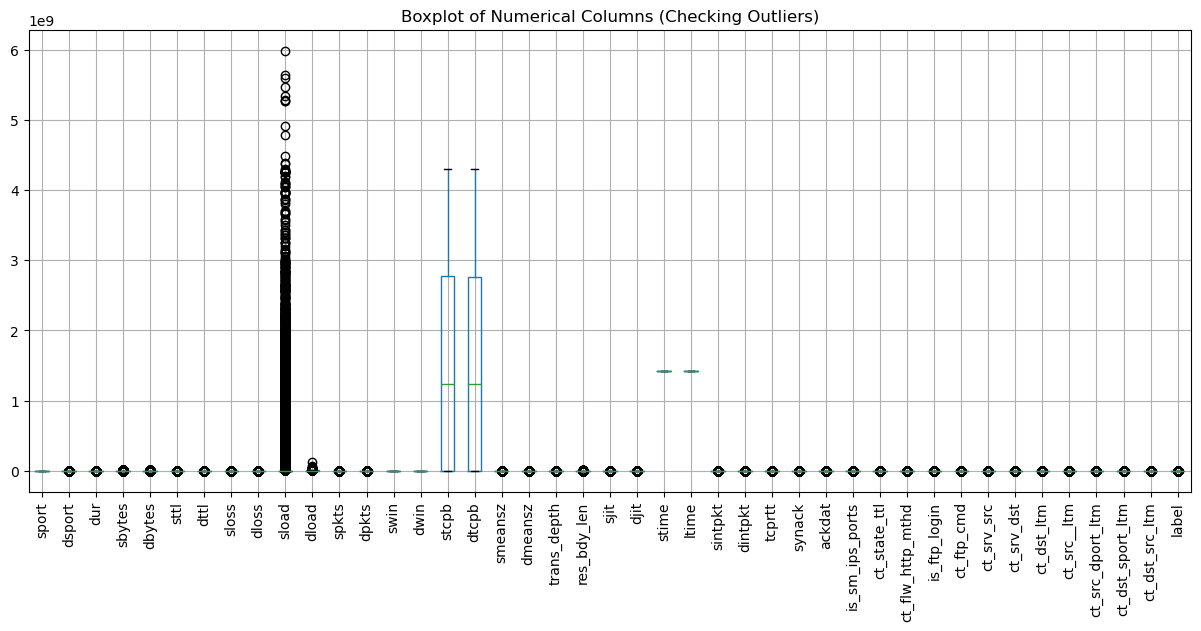

In [30]:
plt.figure(figsize=(15, 6))
df[numerical_columns].boxplot(rot=90)
plt.title("Boxplot of Numerical Columns (Checking Outliers)")
plt.savefig("Boxplot of Numerical Columns (Checking Outliers).png")
plt.show()

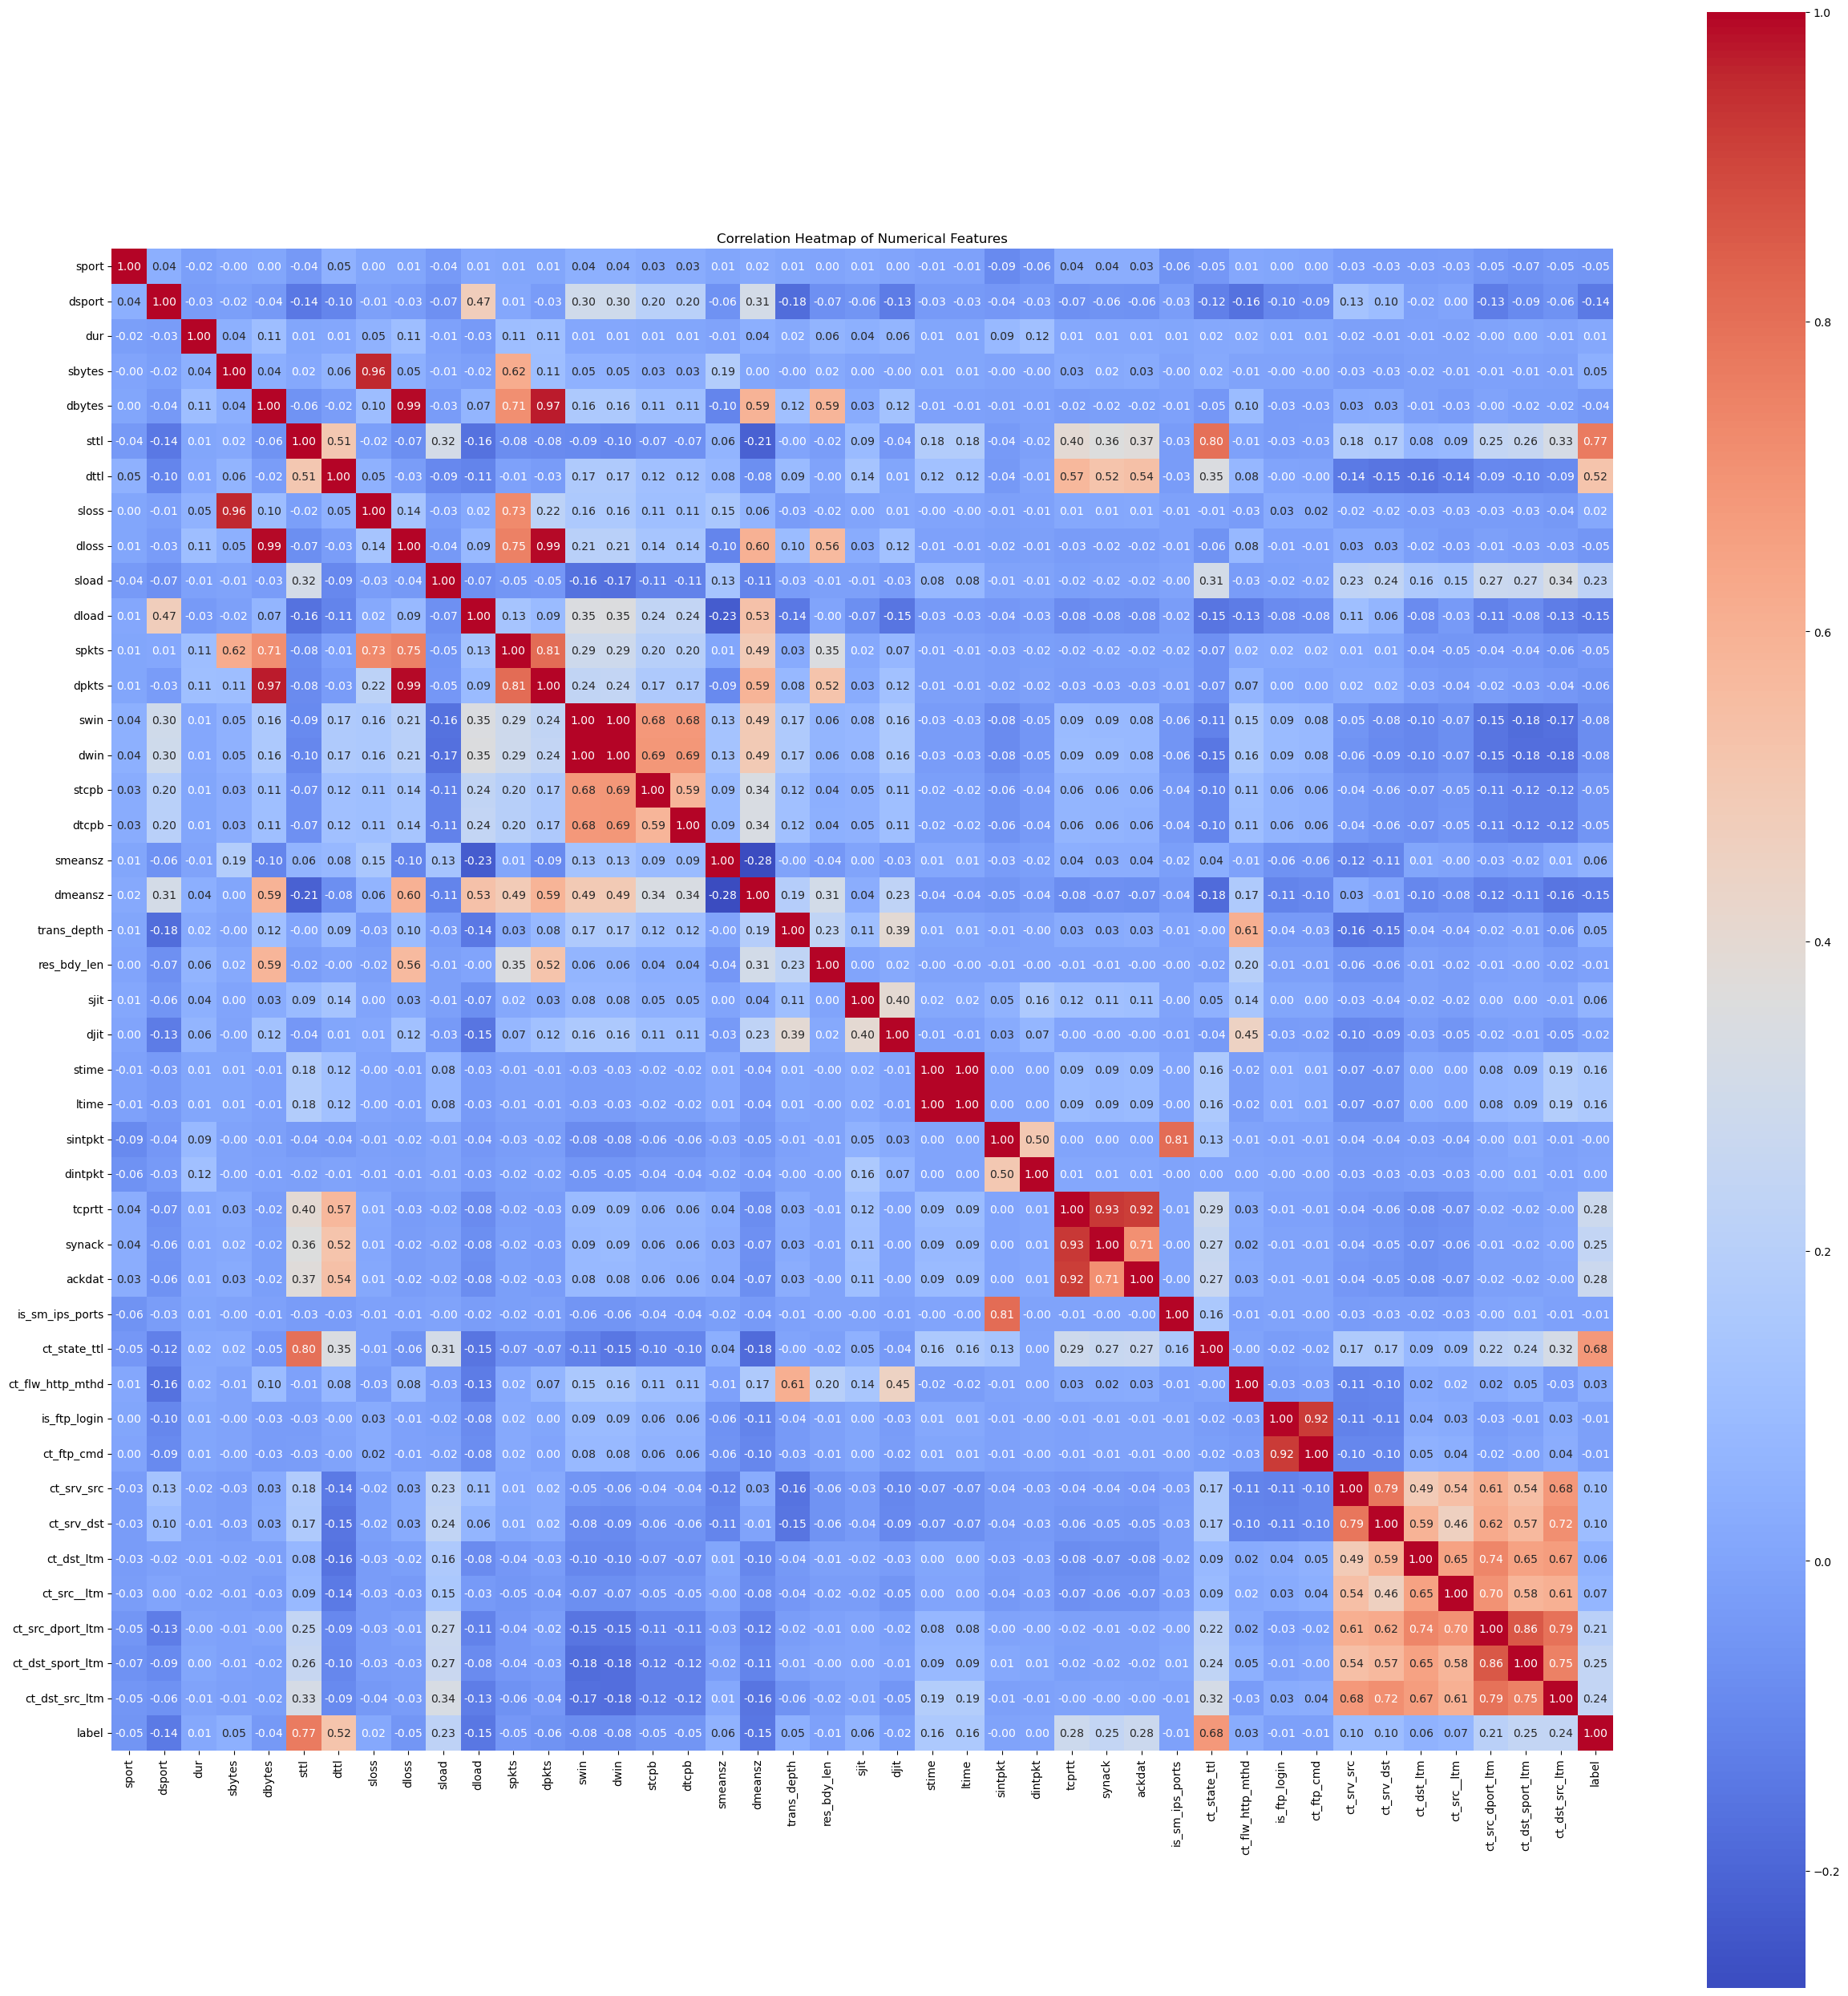

In [31]:
numerical_features = df.select_dtypes(include='number').columns

corr = df[numerical_features].corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

Step 6: Enconding 

In [32]:
from sklearn.preprocessing import OneHotEncoder

# Separate features from the label
X_features_only = df.drop(columns=['label'])
y = df['label']

# Define low- and high-card categorical features
low_card_cats = ['proto', 'state']
high_card_cats = ['service']
low_card_cats = ['proto', 'state']   # safe for OneHot
high_card_cats = ['service']         # will use frequency encoding

# OneHot for low-cardinality
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_ohe = ohe.fit_transform(X_features_only[low_card_cats])
ohe_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out(low_card_cats))

# Frequency Encoding for high-cardinality
for col in high_card_cats:
    freq_map = X_features_only[col].value_counts(normalize=True).to_dict()
    X_features_only[col + "_freq"] = X_features_only[col].map(freq_map)

# Drop original categorical cols
X_numerical = X_features_only.drop(columns=low_card_cats + high_card_cats).reset_index(drop=True)

# Final preprocessed features
preprocessed_df = pd.concat([X_numerical, ohe_df, y.reset_index(drop=True)], axis=1)

print("Hybrid Encoding Done")
print("Final Preprocessed Shape:", preprocessed_df.shape)


Hybrid Encoding Done
Final Preprocessed Shape: (2059408, 198)


Step 7: Normalization/Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Separate features (X) and label (y)
X_features_final = preprocessed_df.drop(columns=['label'])
y_labels = preprocessed_df['label']

#Keep only numeric columns
X_numeric = X_features_final.select_dtypes(include=['int64', 'float64'])

print("Before scaling:", X_features_final.shape)
print("After keeping numeric only:", X_numeric.shape)

# Initialize and fit MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Save scaler
joblib.dump(scaler, 'scaler.joblib')

print("Scaling Completed")
print("Scaled Data Shape:", X_scaled.shape)

Before scaling: (2059408, 197)
After keeping numeric only: (2059408, 194)
Scaling Completed
Scaled Data Shape: (2059408, 194)


Step 8: Model Building

In [34]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve,
    f1_score, confusion_matrix, roc_curve, accuracy_score,
    precision_score, recall_score, auc
)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [36]:
# Train/Val/Test Split
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (1318020, 194), Val: (329506, 194), Test: (411882, 194)


In [37]:
# Utility functions

def youden_j_threshold(y_true, scores):
    """Pick threshold using Youden's J statistic"""
    fpr, tpr, thresholds = roc_curve(y_true, scores)
    j = tpr - fpr
    ix = np.argmax(j)
    return thresholds[ix], fpr[ix], tpr[ix]

def evaluate_scores(y_true, scores, threshold=None):
    """Comprehensive evaluation metrics"""
    try: 
        roc = roc_auc_score(y_true, scores)
    except: 
        roc = np.nan
    try: 
        pr = average_precision_score(y_true, scores)
    except: 
        pr = np.nan

    if threshold is None:
        threshold, _, _ = youden_j_threshold(y_true, scores)

    y_pred = (scores >= threshold).astype(int)

    f1 = f1_score(y_true, y_pred, zero_division=0)
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    return {
        "roc_auc": roc,
        "pr_auc": pr,
        "f1": f1,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "threshold": threshold,
        "confusion_matrix": cm
    }

In [38]:
def build_dense_autoencoder(input_dim, latent_dim=32):
    """Autoencoder architecture"""
    inp = keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inp)
    x = layers.Dense(64, activation='relu')(x)
    z = layers.Dense(latent_dim, activation='relu', name='latent')(x)
    x = layers.Dense(64, activation='relu')(z)
    x = layers.Dense(128, activation='relu')(x)
    out = layers.Dense(input_dim, activation='sigmoid')(x)
    
    ae = keras.Model(inputs=inp, outputs=out)
    encoder = keras.Model(inputs=inp, outputs=z)
    ae.compile(optimizer='adam', loss='mse')
    return ae, encoder

Step 8.1: Autoencoder

In [39]:
print("MODEL 1: AUTOENCODER (RECONSTRUCTION ERROR)")

# --- (A) Autoencoder-only ---
input_dim = X_train.shape[1]
latent_dim = 32

# Train on normal data only
train_normal_mask = (y_train == 0)
X_train_ae = X_train[train_normal_mask]

ae_model, ae_encoder = build_dense_autoencoder(input_dim, latent_dim)

device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"
with tf.device(device):
    hist = ae_model.fit(
        X_train_ae, X_train_ae,
        epochs=30,
        batch_size=1024,
        validation_split=0.1,
        callbacks=[keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True
        )],
        verbose=1
    )

# Validation threshold
recon_val = ae_model.predict(X_val, batch_size=1024)
mse_val = np.mean(np.power(X_val - recon_val, 2), axis=1)
threshold_ae, _, _ = youden_j_threshold(y_val, mse_val)

# Test evaluation
recon_test = ae_model.predict(X_test, batch_size=1024)
mse_test = np.mean(np.power(X_test - recon_test, 2), axis=1)
ae_eval = evaluate_scores(y_test, mse_test, threshold=threshold_ae)

# Print all metrics
print("AE-only Evaluation Metrics:")
print(f"ROC-AUC   : {ae_eval['roc_auc']:.4f}")
print(f"PR-AUC    : {ae_eval['pr_auc']:.4f}")
print(f"F1 Score  : {ae_eval['f1']:.4f}")
print(f"Accuracy  : {ae_eval['accuracy']:.4f}")
print(f"Precision : {ae_eval['precision']:.4f}")
print(f"Recall    : {ae_eval['recall']:.4f}")
print(f"Threshold : {ae_eval['threshold']:.4f}")
print("Confusion Matrix:\n", ae_eval['confusion_matrix'])

MODEL 1: AUTOENCODER (RECONSTRUCTION ERROR)
Epoch 1/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0061 - val_loss: 7.0125e-04
Epoch 2/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 6.4538e-04 - val_loss: 5.8639e-04
Epoch 3/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 5.7925e-04 - val_loss: 5.7028e-04
Epoch 4/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 5.7021e-04 - val_loss: 5.5775e-04
Epoch 5/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 4.3276e-04 - val_loss: 3.6025e-04
Epoch 6/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 3.5525e-04 - val_loss: 3.5075e-04
Epoch 7/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 3.4855e-04 - val_loss: 3.4599e-04
Epoch 8/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 3.3664e-04 - val_loss: 3.3434e-04
Epoch 9/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 3.3068e-04 - val_loss: 3.2853e-04
Epoch 10/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 2.9947e-04 - v

Step 8.2: Isolation Forest

In [40]:
print("MODEL 2: ISOLATION FOREST (FULL FEATURES)")
# (B) Isolation Forest-only

# Dimensionality reduction for speed
svd = TruncatedSVD(n_components=100, random_state=42)
X_train_svd = svd.fit_transform(X_train)
X_val_svd = svd.transform(X_val)
X_test_svd = svd.transform(X_test)

iso_full = IsolationForest(
    n_estimators=200,
    max_samples=10000,
    contamination='auto',
    random_state=42,
    n_jobs=-1
)
iso_full.fit(X_train_svd)

# Validation threshold
scores_val_if = -iso_full.decision_function(X_val_svd)
scores_val_if = (scores_val_if - scores_val_if.min()) / (scores_val_if.max() - scores_val_if.min())
threshold_if, _, _ = youden_j_threshold(y_val, scores_val_if)

# Test evaluation
scores_test_if = -iso_full.decision_function(X_test_svd)
scores_test_if = (scores_test_if - scores_test_if.min()) / (scores_test_if.max() - scores_test_if.min())
if_eval = evaluate_scores(y_test, scores_test_if, threshold=threshold_if)

# Print all metrics
print("IF-only Evaluation Metrics:")
print(f"ROC-AUC   : {if_eval['roc_auc']:.4f}")
print(f"PR-AUC    : {if_eval['pr_auc']:.4f}")
print(f"F1 Score  : {if_eval['f1']:.4f}")
print(f"Accuracy  : {if_eval['accuracy']:.4f}")
print(f"Precision : {if_eval['precision']:.4f}")
print(f"Recall    : {if_eval['recall']:.4f}")
print(f"Threshold : {if_eval['threshold']:.4f}")
print("Confusion Matrix:\n", if_eval['confusion_matrix'])


MODEL 2: ISOLATION FOREST (FULL FEATURES)
IF-only Evaluation Metrics:
ROC-AUC   : 0.9509
PR-AUC    : 0.4069
F1 Score  : 0.4111
Accuracy  : 0.8659
Precision : 0.2610
Recall    : 0.9671
Threshold : 0.0397
Confusion Matrix:
 [[337388  54565]
 [   656  19273]]


Step 8.3:Autoencoder + Isolation Forest

In [41]:
print("MODEL 3: AE + ISOLATION FOREST (LATENT)")

# AE + IF (latent)
# Extract latent vectors from trained AE
latent_train = ae_encoder.predict(X_train, batch_size=1024)
latent_val = ae_encoder.predict(X_val, batch_size=1024)
latent_test = ae_encoder.predict(X_test, batch_size=1024)

latent_train_normal = latent_train[y_train == 0]

if_latent = IsolationForest(
    n_estimators=200,
    max_samples='auto',
    contamination='auto',
    random_state=42,
    n_jobs=-1
)
if_latent.fit(latent_train_normal)

# Validation threshold
scores_val_if_latent = -if_latent.decision_function(latent_val)
scores_val_if_latent = (scores_val_if_latent - scores_val_if_latent.min()) / \
                       (scores_val_if_latent.max() - scores_val_if_latent.min())
threshold_if_latent, _, _ = youden_j_threshold(y_val, scores_val_if_latent)

# Test evaluation
scores_test_if_latent = -if_latent.decision_function(latent_test)
scores_test_if_latent = (scores_test_if_latent - scores_test_if_latent.min()) / \
                        (scores_test_if_latent.max() - scores_test_if_latent.min())
ae_if_eval = evaluate_scores(y_test, scores_test_if_latent, threshold=threshold_if_latent)

# Print all metrics
print("AE + IF (latent) Evaluation Metrics:")
print(f"ROC-AUC   : {ae_if_eval['roc_auc']:.4f}")
print(f"PR-AUC    : {ae_if_eval['pr_auc']:.4f}")
print(f"F1 Score  : {ae_if_eval['f1']:.4f}")
print(f"Accuracy  : {ae_if_eval['accuracy']:.4f}")
print(f"Precision : {ae_if_eval['precision']:.4f}")
print(f"Recall    : {ae_if_eval['recall']:.4f}")
print(f"Threshold : {ae_if_eval['threshold']:.4f}")
print("Confusion Matrix:\n", ae_if_eval['confusion_matrix'])


MODEL 3: AE + ISOLATION FOREST (LATENT)
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
AE + IF (latent) Evaluation Metrics:
ROC-AUC   : 0.9842
PR-AUC    : 0.6066
F1 Score  : 0.6725
Accuracy  : 0.9532
Precision : 0.5086
Recall    : 0.9922
Threshold : 0.4114
Confusion Matrix:
 [[372848  19105]
 [   156  19773]]


Step: 8.4 Local Outiler Factor

In [42]:
print("MODEL 4: LOCAL OUTLIER FACTOR (FULL FEATURES)")

# (C) Local Outlier Factor-only
# Use SVD-reduced features
X_train_normal_svd = X_train_svd[y_train == 0]

# Sample for LOF (it's memory intensive)
max_samples_lof = 50000
if len(X_train_normal_svd) > max_samples_lof:
    idx = np.random.choice(len(X_train_normal_svd), max_samples_lof, replace=False)
    X_train_normal_svd = X_train_normal_svd[idx]

lof_full = LocalOutlierFactor(
    n_neighbors=20,
    novelty=True,
    n_jobs=-1
)
lof_full.fit(X_train_normal_svd)

# Validation threshold
scores_val_lof = -lof_full.decision_function(X_val_svd)
scores_val_lof = (scores_val_lof - scores_val_lof.min()) / (scores_val_lof.max() - scores_val_lof.min())
threshold_lof, _, _ = youden_j_threshold(y_val, scores_val_lof)

# Test evaluation
scores_test_lof = -lof_full.decision_function(X_test_svd)
scores_test_lof = (scores_test_lof - scores_test_lof.min()) / (scores_test_lof.max() - scores_test_lof.min())
lof_eval = evaluate_scores(y_test, scores_test_lof, threshold=threshold_lof)

print(f"LOF ROC-AUC: {lof_eval['roc_auc']:.4f}")
print(f"LOF PR-AUC: {lof_eval['pr_auc']:.4f}")
print(f"LOF F1: {lof_eval['f1']:.4f}")
print(f"LOF Accuracy: {lof_eval['accuracy']:.4f}")
print(f"LOF Precision: {lof_eval['precision']:.4f}")
print(f"LOF Recall: {lof_eval['recall']:.4f}")
print(f"LOF Threshold: {lof_eval['threshold']:.4f}")
print("LOF Confusion Matrix:\n", lof_eval['confusion_matrix'])


MODEL 4: LOCAL OUTLIER FACTOR (FULL FEATURES)
LOF ROC-AUC: 0.7670
LOF PR-AUC: 0.4607
LOF F1: 0.3112
LOF Accuracy: 0.8740
LOF Precision: 0.2116
LOF Recall: 0.5882
LOF Threshold: 0.0018
LOF Confusion Matrix:
 [[348275  43678]
 [  8207  11722]]


Step 8.5: Autoencoder + Local Outlier Factor

In [43]:
print("MODEL 5: AE + LOCAL OUTLIER FACTOR (LATENT)")
# (D) AE + LOF on latent space

latent_train_normal = latent_train[y_train == 0]

# Sample if needed
if len(latent_train_normal) > max_samples_lof:
    idx = np.random.choice(len(latent_train_normal), max_samples_lof, replace=False)
    latent_train_normal = latent_train_normal[idx]

lof_latent = LocalOutlierFactor(
    n_neighbors=20,
    novelty=True,
    n_jobs=-1
)
lof_latent.fit(latent_train_normal)

# Validation threshold
scores_val_lof_latent = -lof_latent.decision_function(latent_val)
scores_val_lof_latent = (scores_val_lof_latent - scores_val_lof_latent.min()) / \
                        (scores_val_lof_latent.max() - scores_val_lof_latent.min())
threshold_lof_latent, _, _ = youden_j_threshold(y_val, scores_val_lof_latent)

# Test evaluation
scores_test_lof_latent = -lof_latent.decision_function(latent_test)
scores_test_lof_latent = (scores_test_lof_latent - scores_test_lof_latent.min()) / \
                         (scores_test_lof_latent.max() - scores_test_lof_latent.min())
ae_lof_eval = evaluate_scores(y_test, scores_test_lof_latent, threshold=threshold_lof_latent)


# Print all metrics
print("AE + LOF Evaluation Metrics:")
print(f"ROC-AUC   : {ae_lof_eval['roc_auc']:.4f}")
print(f"PR-AUC    : {ae_lof_eval['pr_auc']:.4f}")
print(f"F1 Score  : {ae_lof_eval['f1']:.4f}")
print(f"Accuracy  : {ae_lof_eval['accuracy']:.4f}")
print(f"Precision : {ae_lof_eval['precision']:.4f}")
print(f"Recall    : {ae_lof_eval['recall']:.4f}")
print(f"Threshold : {ae_lof_eval['threshold']:.4f}")
print("Confusion Matrix:\n", ae_lof_eval['confusion_matrix'])


MODEL 5: AE + LOCAL OUTLIER FACTOR (LATENT)
AE + LOF Evaluation Metrics:
ROC-AUC   : 0.7867
PR-AUC    : 0.4498
F1 Score  : 0.3160
Accuracy  : 0.8725
Precision : 0.2134
Recall    : 0.6088
Threshold : 0.0026
Confusion Matrix:
 [[347232  44721]
 [  7796  12133]]


Step 8.6 SVM

In [44]:
print("MODEL 6: SVM (OPTIMIZED WITH SVD)")

# (C) SVM-only (subset of full features)

# Use balanced subset with SVD features for speed
n_samples_per_class = 30000  # Reduced for faster training

X_normal_svd = X_train_svd[y_train == 0]
y_normal = y_train[y_train == 0]
X_attack_svd = X_train_svd[y_train == 1]
y_attack = y_train[y_train == 1]

from sklearn.utils import resample
X_normal_sub, y_normal_sub = resample(X_normal_svd, y_normal, 
                                       n_samples=n_samples_per_class, random_state=42)
X_attack_sub, y_attack_sub = resample(X_attack_svd, y_attack, 
                                       n_samples=n_samples_per_class, random_state=42)

X_train_svm = np.vstack((X_normal_sub, X_attack_sub))
y_train_svm = np.hstack((y_normal_sub, y_attack_sub))

print(f"SVM training on: {X_train_svm.shape}")

svm_full = SVC(
    kernel="rbf",
    C=1.0,  # Default C value
    gamma='scale',  # Auto-scale gamma
    probability=True,
    class_weight="balanced",
    cache_size=1000,  # Increase cache for speed
    random_state=42
)
svm_full.fit(X_train_svm, y_train_svm)

# Validation threshold
scores_val_svm = svm_full.predict_proba(X_val_svd)[:, 1]
threshold_svm, _, _ = youden_j_threshold(y_val, scores_val_svm)

# Test evaluation
scores_test_svm = svm_full.predict_proba(X_test_svd)[:, 1]
svm_eval = evaluate_scores(y_test, scores_test_svm, threshold=threshold_svm)


# Print all metrics
print("SVM-only Evaluation Metrics:")
print(f"ROC-AUC   : {svm_eval['roc_auc']:.4f}")
print(f"PR-AUC    : {svm_eval['pr_auc']:.4f}")
print(f"F1 Score  : {svm_eval['f1']:.4f}")
print(f"Accuracy  : {svm_eval['accuracy']:.4f}")
print(f"Precision : {svm_eval['precision']:.4f}")
print(f"Recall    : {svm_eval['recall']:.4f}")
print(f"Threshold : {svm_eval['threshold']:.4f}")
print("Confusion Matrix:\n", svm_eval['confusion_matrix'])


MODEL 6: SVM (OPTIMIZED WITH SVD)
SVM training on: (60000, 100)
SVM-only Evaluation Metrics:
ROC-AUC   : 0.9968
PR-AUC    : 0.9255
F1 Score  : 0.8725
Accuracy  : 0.9859
Precision : 0.7739
Recall    : 0.9998
Threshold : 0.0684
Confusion Matrix:
 [[386133   5820]
 [     4  19925]]


Step 8.6 Autoencoder + SVM

In [45]:
print("MODEL 7: AE + SVM (LATENT)")
#(E) AE + SVM (latent features)

# Balanced sampling from latent space
latent_normal = latent_train[y_train == 0]
y_normal = y_train[y_train == 0]
latent_attack = latent_train[y_train == 1]
y_attack = y_train[y_train == 1]

latent_normal_sub, y_normal_sub = resample(latent_normal, y_normal, 
                                            n_samples=n_samples_per_class, random_state=42)
latent_attack_sub, y_attack_sub = resample(latent_attack, y_attack, 
                                            n_samples=n_samples_per_class, random_state=42)

latent_train_svm = np.vstack((latent_normal_sub, latent_attack_sub))
y_train_svm = np.hstack((y_normal_sub, y_attack_sub))

svm_latent = SVC(
    kernel="rbf",
    probability=True,
    class_weight="balanced",
    cache_size=1000,
    random_state=42
)
svm_latent.fit(latent_train_svm, y_train_svm)

# Validation threshold
scores_val_svm_latent = svm_latent.predict_proba(latent_val)[:, 1]
threshold_svm_latent, _, _ = youden_j_threshold(y_val, scores_val_svm_latent)

# Test evaluation
scores_test_svm_latent = svm_latent.predict_proba(latent_test)[:, 1]
ae_svm_eval = evaluate_scores(y_test, scores_test_svm_latent, threshold=threshold_svm_latent)

print("AE + SVM Evaluation Metrics:")
print(f"ROC-AUC   : {ae_svm_eval['roc_auc']:.4f}")
print(f"PR-AUC    : {ae_svm_eval['pr_auc']:.4f}")
print(f"F1 Score  : {ae_svm_eval['f1']:.4f}")
print(f"Accuracy  : {ae_svm_eval['accuracy']:.4f}")
print(f"Precision : {ae_svm_eval['precision']:.4f}")
print(f"Recall    : {ae_svm_eval['recall']:.4f}")
print(f"Threshold : {ae_svm_eval['threshold']:.4f}")
print("Confusion Matrix:\n", ae_svm_eval['confusion_matrix'])

MODEL 7: AE + SVM (LATENT)
AE + SVM Evaluation Metrics:
ROC-AUC   : 0.9968
PR-AUC    : 0.9249
F1 Score  : 0.8664
Accuracy  : 0.9851
Precision : 0.7647
Recall    : 0.9993
Threshold : 0.3845
Confusion Matrix:
 [[385824   6129]
 [    13  19916]]


Step 9: Saving the Models

In [46]:
os.makedirs("models", exist_ok=True)

# Save preprocessing
joblib.dump(scaler, 'models/scaler.joblib')
joblib.dump(svd, 'models/svd_reducer.joblib')

# Save data splits
np.save("models/X_scaled.npy", X_scaled)
np.save("models/y_labels.npy", y_labels.to_numpy())
np.save("models/X_train.npy", X_train)
np.save("models/X_val.npy", X_val)
np.save("models/X_test.npy", X_test)
np.save("models/y_train.npy", y_train)
np.save("models/y_val.npy", y_val)
np.save("models/y_test.npy", y_test)

# Save deep learning models
ae_model.save('models/autoencoder_model.keras')
ae_encoder.save('models/autoencoder_encoder.keras')

# Save traditional ML models
joblib.dump(iso_full, 'models/if_full.joblib')
joblib.dump(if_latent, 'models/if_latent.joblib')
joblib.dump(lof_full, 'models/lof_full.joblib')
joblib.dump(lof_latent, 'models/lof_latent.joblib')
joblib.dump(svm_full, 'models/svm_full.joblib')
joblib.dump(svm_latent, 'models/svm_latent.joblib')

# Save all scores and predictions
scores_dict = {
    'ae': mse_test,
    'if_full': scores_test_if,
    'ae_if': scores_test_if_latent,
    'lof_full': scores_test_lof,
    'ae_lof': scores_test_lof_latent,
    'svm_full': scores_test_svm,
    'ae_svm': scores_test_svm_latent
}

for name, scores in scores_dict.items():
    np.save(f"models/scores_{name}.npy", scores)

print("\nAll models saved successfully!")


All models saved successfully!


In [47]:
print("STATISTICAL SIGNIFICANCE TESTING")

all_results = {
    'AE': ae_eval,
    'IF': if_eval,
    'AE+IF': ae_if_eval,
    'LOF': lof_eval,
    'AE+LOF': ae_lof_eval,
    'SVM': svm_eval,
    'AE+SVM': ae_svm_eval
}

# Create results dataframe
results_df = pd.DataFrame({
    name: {
        'ROC-AUC': res['roc_auc'],
        'PR-AUC': res['pr_auc'],
        'F1-Score': res['f1'],
        'Accuracy': res['accuracy'],
        'Precision': res['precision'],
        'Recall': res['recall']
    } for name, res in all_results.items()
}).T

print("OVERALL RESULTS")
print(results_df.round(4))


STATISTICAL SIGNIFICANCE TESTING
OVERALL RESULTS
        ROC-AUC  PR-AUC  F1-Score  Accuracy  Precision  Recall
AE       0.9848  0.5862    0.7834    0.9733     0.6446  0.9985
IF       0.9509  0.4069    0.4111    0.8659     0.2610  0.9671
AE+IF    0.9842  0.6066    0.6725    0.9532     0.5086  0.9922
LOF      0.7670  0.4607    0.3112    0.8740     0.2116  0.5882
AE+LOF   0.7867  0.4498    0.3160    0.8725     0.2134  0.6088
SVM      0.9968  0.9255    0.8725    0.9859     0.7739  0.9998
AE+SVM   0.9968  0.9249    0.8664    0.9851     0.7647  0.9993


BOOTSTRAP CONFIDENCE INTERVALS AND PAIRED T-TESTS

In [49]:
def bootstrap_metric(y_true, scores, metric_func, n_bootstrap=1000):
    """Calculate bootstrap confidence interval for a metric"""
    bootstrap_scores = []
    n_samples = len(y_true)

    # Convert to NumPy arrays to avoid index mismatch issues
    y_true = np.array(y_true)
    scores = np.array(scores)
    
    for _ in range(n_bootstrap):
        indices = np.random.choice(n_samples, n_samples, replace=True)
        y_boot = y_true[indices]
        scores_boot = scores[indices]

        try:
            score = metric_func(y_boot, scores_boot)
            bootstrap_scores.append(score)
        except:
            continue
    
    bootstrap_scores = np.array(bootstrap_scores)
    ci_lower = np.percentile(bootstrap_scores, 2.5)
    ci_upper = np.percentile(bootstrap_scores, 97.5)
    mean_score = np.mean(bootstrap_scores)
    
    return mean_score, ci_lower, ci_upper


print("BOOTSTRAP 95% CONFIDENCE INTERVALS (ROC-AUC)")
for name, scores in scores_dict.items():
    mean, ci_lower, ci_upper = bootstrap_metric(
        y_test, scores, roc_auc_score, n_bootstrap=1000
    )
    print(f"{name:15s}: {mean:.4f} [{ci_lower:.4f}, {ci_upper:.4f}]")


BOOTSTRAP 95% CONFIDENCE INTERVALS (ROC-AUC)
ae             : 0.9848 [0.9844, 0.9851]
if_full        : 0.9509 [0.9501, 0.9516]
ae_if          : 0.9842 [0.9839, 0.9846]
lof_full       : 0.7672 [0.7628, 0.7715]
ae_lof         : 0.7867 [0.7826, 0.7907]
svm_full       : 0.9968 [0.9967, 0.9969]
ae_svm         : 0.9968 [0.9967, 0.9970]


PAIRED T-TESTS (Compare best model with others)

In [53]:
print("PAIRED T-TESTS")

# Find best model based on F1-score
best_model_name = results_df['F1-Score'].idxmax()
print(f"\nBest Model (by F1): {best_model_name}")
print(f"Comparing all models against {best_model_name}:\n")

def get_per_sample_f1_approximation(y_true, scores, threshold):
    return (scores >= threshold).astype(int)

# --- Normalization function ---
def normalize_key(name):
    name = name.lower().replace('_full', '')  # remove _full suffix
    name = name.replace('_', '+')             # replace underscore with plus
    return name.upper()                       # uppercase for final match

# Create lookup for all_results keys
all_results_lookup = {normalize_key(k): k for k in all_results.keys()}

print("Keys in all_results:", list(all_results.keys()))
print("Keys in scores_dict:", list(scores_dict.keys()))

predictions = {}

for name, scores in scores_dict.items():
    norm_name = normalize_key(name)
    key_in_all_results = all_results_lookup.get(norm_name)
    
    if key_in_all_results is None:
        print(f"Warning: {name} not found in all_results keys (normalized as {norm_name}). Skipping...")
        continue

    threshold = all_results[key_in_all_results]['threshold']
    predictions[norm_name] = get_per_sample_f1_approximation(y_test, scores, threshold)

# --- Get best model predictions ---
best_norm = normalize_key(best_model_name)
if best_norm not in predictions:
    print(f"Best model {best_model_name} not found in predictions dictionary!")
else:
    best_pred = predictions[best_norm]

    print(f"{'Model':<15} {'t-statistic':>12} {'p-value':>12} {'Significant?':>15}")
    print("-" * 60)

    for name, pred in predictions.items():
        if name == best_norm:
            continue
        
        correct_best = (best_pred == y_test).astype(int)
        correct_other = (pred == y_test).astype(int)
        
        t_stat, p_value = ttest_rel(correct_best, correct_other)
        significant = "Yes (p<0.05)" if p_value < 0.05 else "No"
        
        print(f"{name:<15} {t_stat:>12.4f} {p_value:>12.4f} {significant:>15}")

PAIRED T-TESTS

Best Model (by F1): SVM
Comparing all models against SVM:

Keys in all_results: ['AE', 'IF', 'AE+IF', 'LOF', 'AE+LOF', 'SVM', 'AE+SVM']
Keys in scores_dict: ['ae', 'if_full', 'ae_if', 'lof_full', 'ae_lof', 'svm_full', 'ae_svm']
Model            t-statistic      p-value    Significant?
------------------------------------------------------------
AE                   72.2526       0.0000    Yes (p<0.05)
IF                  234.0934       0.0000    Yes (p<0.05)
AE+IF               117.8019       0.0000    Yes (p<0.05)
LOF                 204.5478       0.0000    Yes (p<0.05)
AE+LOF              208.0372       0.0000    Yes (p<0.05)
AE+SVM               17.6733       0.0000    Yes (p<0.05)


FRIEDMAN TEST (Non-parametric alternative to repeated measures ANOVA)

In [54]:
print("FRIEDMAN TEST (Overall Difference Across Models)")
print("="*60)

# Prepare data for Friedman test
correct_predictions = []
model_names = []

for name, pred in predictions.items():
    correct = (pred == y_test).astype(int)
    correct_predictions.append(correct)
    model_names.append(name)

# Perform Friedman test
stat, p_value = friedmanchisquare(*correct_predictions)

print(f"Friedman statistic: {stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("\n✓ Significant difference exists among models (p < 0.05)")
else:
    print("\n✗ No significant difference among models (p >= 0.05)")


FRIEDMAN TEST (Overall Difference Across Models)
Friedman statistic: 153166.3550
p-value: 0.000000

✓ Significant difference exists among models (p < 0.05)


Step 10: Evaulation

In [55]:
os.makedirs("results", exist_ok=True)

# Save main results
results_df.to_csv("results/model_comparison.csv")

# Save statistical test results
with open("results/statistical_tests.txt", "w") as f:
    f.write("="*60 + "\n")
    f.write("STATISTICAL SIGNIFICANCE TESTS\n")
    f.write("="*60 + "\n\n")
    
    f.write(f"Best Model: {best_model_name}\n")
    f.write(f"Best F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}\n\n")
    
    f.write("PAIRED T-TESTS\n")
    f.write("-"*60 + "\n")
    for name, pred in predictions.items():
        if name == best_model_name:
            continue
        correct_best = (best_pred == y_test).astype(int)
        correct_other = (pred == y_test).astype(int)
        t_stat, p_value = ttest_rel(correct_best, correct_other)
        f.write(f"{name}: t={t_stat:.4f}, p={p_value:.4f}\n")
    
    f.write(f"\nFRIEDMAN TEST\n")
    f.write("-"*60 + "\n")
    f.write(f"Statistic: {stat:.4f}\n")
    f.write(f"p-value: {p_value:.6f}\n")

print("\n✓ Statistical results saved to results/statistical_tests.txt")



✓ Statistical results saved to results/statistical_tests.txt


VISUALIZATIONS

In [ ]:
os.makedirs("figures", exist_ok=True)

# 1. Model Comparison Bar Plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics = ['ROC-AUC', 'PR-AUC', 'F1-Score', 'Accuracy', 'Precision', 'Recall']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    results_df[metric].plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('figures/model_comparison_metrics.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. ROC Curves
plt.figure(figsize=(10, 8))
for name, scores in scores_dict.items():
    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name.upper()} (AUC={roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.savefig('figures/roc_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Precision-Recall Curves
plt.figure(figsize=(10, 8))
for name, scores in scores_dict.items():
    precision, recall, _ = precision_recall_curve(y_test, scores)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f'{name.upper()} (AUC={pr_auc:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=10)
plt.grid(alpha=0.3)
plt.savefig('figures/pr_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

# 4. Confusion Matrices (Combined)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, (name, res) in enumerate(all_results.items()):
    cm = res['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], 
                cbar=False, square=True)
    axes[idx].set_title(f'{name}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')

# Remove extra subplot
axes[-1].remove()

plt.tight_layout()
plt.savefig('figures/confusion_matrices_all.png', dpi=300, bbox_inches='tight')
plt.close()

# 5. Score Distributions
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, (name, scores) in enumerate(scores_dict.items()):
    axes[idx].hist(scores[y_test == 0], bins=50, alpha=0.6, 
                   label='Normal', color='green', density=True)
    axes[idx].hist(scores[y_test == 1], bins=50, alpha=0.6, 
                   label='Attack', color='red', density=True)
    axes[idx].set_title(f'{name.upper()}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Anomaly Score')
    axes[idx].set_ylabel('Density')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

axes[-1].remove()

plt.tight_layout()
plt.savefig('figures/score_distributions.png', dpi=300, bbox_inches='tight')
plt.close()

# 6. Statistical Significance Heatmap (p-values)
model_list = list(predictions.keys())
n_models = len(model_list)
p_value_matrix = np.ones((n_models, n_models))

for i, model1 in enumerate(model_list):
    for j, model2 in enumerate(model_list):
        if i != j:
            correct1 = (predictions[model1] == y_test).astype(int)
            correct2 = (predictions[model2] == y_test).astype(int)
            _, p_val = ttest_rel(correct1, correct2)
            p_value_matrix[i, j] = p_val

plt.figure(figsize=(10, 8))
mask = np.eye(n_models, dtype=bool)
sns.heatmap(p_value_matrix, mask=mask, annot=True, fmt='.4f', 
            cmap='RdYlGn_r', center=0.05, vmin=0, vmax=0.1,
            xticklabels=model_list, yticklabels=model_list,
            cbar_kws={'label': 'p-value'}, square=True)
plt.title('Pairwise T-Test P-Values\n(Green: Significant difference, Red: No difference)', 
          fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/pairwise_significance.png', dpi=300, bbox_inches='tight')
plt.close()

print("\n All visualizations saved to figures/")


PAIRWISE T-TEST P-VALUES

 All visualizations saved to figures/


PERFORMANCE SUMMARY TABLE

In [57]:
print("FINAL PERFORMANCE SUMMARY")

summary_df = results_df.round(4)
summary_df['Rank_F1'] = summary_df['F1-Score'].rank(ascending=False).astype(int)
summary_df['Rank_AUC'] = summary_df['ROC-AUC'].rank(ascending=False).astype(int)
summary_df = summary_df.sort_values('F1-Score', ascending=False)

print(summary_df)
summary_df.to_csv('results/performance_summary.csv')

FINAL PERFORMANCE SUMMARY
        ROC-AUC  PR-AUC  F1-Score  Accuracy  Precision  Recall  Rank_F1  \
SVM      0.9968  0.9255    0.8725    0.9859     0.7739  0.9998        1   
AE+SVM   0.9968  0.9249    0.8664    0.9851     0.7647  0.9993        2   
AE       0.9848  0.5862    0.7834    0.9733     0.6446  0.9985        3   
AE+IF    0.9842  0.6066    0.6725    0.9532     0.5086  0.9922        4   
IF       0.9509  0.4069    0.4111    0.8659     0.2610  0.9671        5   
AE+LOF   0.7867  0.4498    0.3160    0.8725     0.2134  0.6088        6   
LOF      0.7670  0.4607    0.3112    0.8740     0.2116  0.5882        7   

        Rank_AUC  
SVM            1  
AE+SVM         1  
AE             3  
AE+IF          4  
IF             5  
AE+LOF         6  
LOF            7  


COMPUTATIONAL COMPLEXITY ANALYSIS

In [58]:
print("MODEL COMPLEXITY COMPARISON")

complexity_data = {
    'Model': list(all_results.keys()),
    'Training_Samples': [
        len(X_train_ae),  # AE
        len(X_train_svd),  # IF
        len(latent_train_normal),  # AE+IF
        len(X_train_normal_svd) if len(X_train_normal_svd) <= max_samples_lof else max_samples_lof,  # LOF
        len(latent_train_normal) if len(latent_train_normal) <= max_samples_lof else max_samples_lof,  # AE+LOF
        len(X_train_svm),  # SVM
        len(latent_train_svm)  # AE+SVM
    ],
    'Feature_Dimension': [
        input_dim,  # AE
        100,  # IF (SVD)
        latent_dim,  # AE+IF
        100,  # LOF (SVD)
        latent_dim,  # AE+LOF
        100,  # SVM (SVD)
        latent_dim  # AE+SVM
    ],
    'Model_Type': [
        'Deep Learning',
        'Tree-based',
        'Hybrid',
        'Distance-based',
        'Hybrid',
        'Kernel-based',
        'Hybrid'
    ]
}

complexity_df = pd.DataFrame(complexity_data)
complexity_df = complexity_df.merge(
    results_df[['F1-Score', 'ROC-AUC']].reset_index().rename(columns={'index': 'Model'}),
    on='Model'
)

print(complexity_df.to_string(index=False))
complexity_df.to_csv('results/model_complexity.csv', index=False)

MODEL COMPLEXITY COMPARISON
 Model  Training_Samples  Feature_Dimension     Model_Type  F1-Score  ROC-AUC
    AE           1254249                194  Deep Learning  0.783410 0.984780
    IF           1318020                100     Tree-based  0.411083 0.950859
 AE+IF             50000                 32         Hybrid  0.672471 0.984223
   LOF             50000                100 Distance-based  0.311221 0.767036
AE+LOF             50000                 32         Hybrid  0.316033 0.786735
   SVM             60000                100   Kernel-based  0.872488 0.996797
AE+SVM             60000                 32         Hybrid  0.866403 0.996834


RECOMMENDATIONS FOR PAPER

In [59]:
print("KEY FINDINGS & RECOMMENDATIONS FOR PAPER")

best_f1_model = results_df['F1-Score'].idxmax()
best_auc_model = results_df['ROC-AUC'].idxmax()
best_precision_model = results_df['Precision'].idxmax()
best_recall_model = results_df['Recall'].idxmax()

print(f"\n1. BEST OVERALL MODEL (F1-Score): {best_f1_model}")
print(f"   - F1-Score: {results_df.loc[best_f1_model, 'F1-Score']:.4f}")
print(f"   - ROC-AUC: {results_df.loc[best_f1_model, 'ROC-AUC']:.4f}")
print(f"   - Precision: {results_df.loc[best_f1_model, 'Precision']:.4f}")
print(f"   - Recall: {results_df.loc[best_f1_model, 'Recall']:.4f}")

print(f"\n2. BEST DETECTION RATE (Recall): {best_recall_model}")
print(f"   - Recall: {results_df.loc[best_recall_model, 'Recall']:.4f}")

print(f"\n3. BEST PRECISION (Low False Positives): {best_precision_model}")
print(f"   - Precision: {results_df.loc[best_precision_model, 'Precision']:.4f}")

print(f"\n4. HYBRID MODELS PERFORMANCE:")
hybrid_models = ['AE+IF', 'AE+LOF', 'AE+SVM']
for model in hybrid_models:
    if model in results_df.index:
        print(f"   - {model}: F1={results_df.loc[model, 'F1-Score']:.4f}, "
              f"AUC={results_df.loc[model, 'ROC-AUC']:.4f}")

# Calculate improvement
standalone_ae = results_df.loc['AE', 'F1-Score']
standalone_if = results_df.loc['IF', 'F1-Score']
hybrid_ae_if = results_df.loc['AE+IF', 'F1-Score']

improvement = ((hybrid_ae_if - max(standalone_ae, standalone_if)) / 
               max(standalone_ae, standalone_if)) * 100

print(f"\n5. HYBRID ADVANTAGE:")
print(f"   - AE+IF shows {improvement:.2f}% improvement over best standalone")

print("\n6. STATISTICAL SIGNIFICANCE:")
print(f"   - Friedman test p-value: {p_value:.6f}")
if p_value < 0.05:
    print("   - Significant differences exist among models")
else:
    print("   - No significant differences (all models perform similarly)")

print("\n" + "="*60)
print("✓ ANALYSIS COMPLETE - Ready for Research Paper!")
print("="*60)



KEY FINDINGS & RECOMMENDATIONS FOR PAPER

1. BEST OVERALL MODEL (F1-Score): SVM
   - F1-Score: 0.8725
   - ROC-AUC: 0.9968
   - Precision: 0.7739
   - Recall: 0.9998

2. BEST DETECTION RATE (Recall): SVM
   - Recall: 0.9998

3. BEST PRECISION (Low False Positives): SVM
   - Precision: 0.7739

4. HYBRID MODELS PERFORMANCE:
   - AE+IF: F1=0.6725, AUC=0.9842
   - AE+LOF: F1=0.3160, AUC=0.7867
   - AE+SVM: F1=0.8664, AUC=0.9968

5. HYBRID ADVANTAGE:
   - AE+IF shows -14.16% improvement over best standalone

6. STATISTICAL SIGNIFICANCE:
   - Friedman test p-value: 0.000000
   - Significant differences exist among models

✓ ANALYSIS COMPLETE - Ready for Research Paper!


CREATE LATEX TABLE FOR PAPER

In [60]:
latex_table = results_df[['ROC-AUC', 'PR-AUC', 'F1-Score', 'Precision', 'Recall', 'Accuracy']].round(4)

with open('results/latex_table.tex', 'w') as f:
    f.write("\\begin{table}[h]\n")
    f.write("\\centering\n")
    f.write("\\caption{Performance Comparison of Anomaly Detection Models}\n")
    f.write("\\label{tab:results}\n")
    f.write("\\begin{tabular}{lcccccc}\n")
    f.write("\\hline\n")
    f.write("Model & ROC-AUC & PR-AUC & F1-Score & Precision & Recall & Accuracy \\\\\n")
    f.write("\\hline\n")
    
    for model, row in latex_table.iterrows():
        f.write(f"{model} & ")
        f.write(" & ".join([f"{val:.4f}" for val in row.values]))
        f.write(" \\\\\n")
    
    f.write("\\hline\n")
    f.write("\\end{tabular}\n")
    f.write("\\end{table}\n")

print("\n✓ LaTeX table saved to results/latex_table.tex")



✓ LaTeX table saved to results/latex_table.tex


EXPORT FINAL REPORT

In [61]:

with open('results/FINAL_REPORT.txt', 'w') as f:
    f.write("="*70 + "\n")
    f.write("NETWORK INTRUSION DETECTION - COMPARATIVE STUDY\n")
    f.write("FINAL RESULTS REPORT\n")
    f.write("="*70 + "\n\n")
    
    f.write("1. DATASET INFORMATION\n")
    f.write("-"*70 + "\n")
    f.write(f"Total Samples: {len(y_labels)}\n")
    f.write(f"Training Samples: {len(y_train)}\n")
    f.write(f"Validation Samples: {len(y_val)}\n")
    f.write(f"Test Samples: {len(y_test)}\n")
    f.write(f"Features: {input_dim}\n")
    f.write(f"Normal Traffic: {sum(y_test == 0)} ({sum(y_test == 0)/len(y_test)*100:.1f}%)\n")
    f.write(f"Attack Traffic: {sum(y_test == 1)} ({sum(y_test == 1)/len(y_test)*100:.1f}%)\n\n")
    
    f.write("2. MODELS EVALUATED\n")
    f.write("-"*70 + "\n")
    f.write("- Autoencoder (AE)\n")
    f.write("- Isolation Forest (IF)\n")
    f.write("- Local Outlier Factor (LOF)\n")
    f.write("- Support Vector Machine (SVM)\n")
    f.write("- AE + IF (Hybrid)\n")
    f.write("- AE + LOF (Hybrid)\n")
    f.write("- AE + SVM (Hybrid)\n\n")
    
    f.write("3. PERFORMANCE RESULTS\n")
    f.write("-"*70 + "\n")
    f.write(results_df.to_string())
    f.write("\n\n")
    
    f.write("4. STATISTICAL SIGNIFICANCE\n")
    f.write("-"*70 + "\n")
    f.write(f"Best Model: {best_f1_model}\n")
    f.write(f"Friedman Test: χ²={stat:.4f}, p={p_value:.6f}\n")
    if p_value < 0.05:
        f.write("Result: Significant differences exist (p < 0.05)\n\n")
    else:
        f.write("Result: No significant differences (p >= 0.05)\n\n")
    
    f.write("5. KEY FINDINGS\n")
    f.write("-"*70 + "\n")
    f.write(f"- Best F1-Score: {best_f1_model} ({results_df.loc[best_f1_model, 'F1-Score']:.4f})\n")
    f.write(f"- Best ROC-AUC: {best_auc_model} ({results_df.loc[best_auc_model, 'ROC-AUC']:.4f})\n")
    f.write(f"- Best Recall: {best_recall_model} ({results_df.loc[best_recall_model, 'Recall']:.4f})\n")
    f.write(f"- Best Precision: {best_precision_model} ({results_df.loc[best_precision_model, 'Precision']:.4f})\n\n")
    
    f.write("6. RECOMMENDATIONS\n")
    f.write("-"*70 + "\n")
    f.write(f"For production deployment: {best_f1_model}\n")
    f.write(f"For maximum detection: {best_recall_model}\n")
    f.write(f"For minimum false alarms: {best_precision_model}\n\n")
    
    f.write("="*70 + "\n")
    f.write("END OF REPORT\n")
    f.write("="*70 + "\n")

print("\n✓ Final report saved to results/FINAL_REPORT.txt")
print("\n" + "="*70)
print("ALL ANALYSES COMPLETE!")
print("="*70)
print("\nGenerated Files:")
print("  📊 results/model_comparison.csv")
print("  📊 results/performance_summary.csv")
print("  📊 results/model_complexity.csv")
print("  📊 results/statistical_tests.txt")
print("  📊 results/latex_table.tex")
print("  📊 results/FINAL_REPORT.txt")
print("  📈 figures/model_comparison_metrics.png")
print("  📈 figures/roc_curves_comparison.png")
print("  📈 figures/pr_curves_comparison.png")
print("  📈 figures/confusion_matrices_all.png")
print("  📈 figures/score_distributions.png")
print("  📈 figures/pairwise_significance.png")
print("  💾 models/ (all trained models saved)")
print("\nReady for publication! 🎉")


✓ Final report saved to results/FINAL_REPORT.txt

ALL ANALYSES COMPLETE!

Generated Files:
  📊 results/model_comparison.csv
  📊 results/performance_summary.csv
  📊 results/model_complexity.csv
  📊 results/statistical_tests.txt
  📊 results/latex_table.tex
  📊 results/FINAL_REPORT.txt
  📈 figures/model_comparison_metrics.png
  📈 figures/roc_curves_comparison.png
  📈 figures/pr_curves_comparison.png
  📈 figures/confusion_matrices_all.png
  📈 figures/score_distributions.png
  📈 figures/pairwise_significance.png
  💾 models/ (all trained models saved)

Ready for publication! 🎉
